In [1]:
%matplotlib inline
from IPython.display import clear_output
import time
from Environments.environments import all_envs, get_all_avail_envs
from Agents.dqn_agent import DQN_Agent
from Agents.ppo_agent import PPO_Agent
from Models import fc, rnn
import matplotlib.pyplot as plt
import torch
import utils
from Curriculum_managers.random_curriculum import Random_Curriculum
import plotly.express as px
import gym
import os
# os.environ["LANG"]="en_US"

In [2]:
env_names = get_all_avail_envs()
env_names

['SingleTaxiEnv', 'FrozenLakeEnv']

In [3]:
device = utils.init_torch()

In [4]:
env = all_envs['SingleTaxiEnv'](random_reset_loc=True)
n_actions = env.action_space.n
obs_shape = env.observation_space['image'].shape
env.dummy_init()

In [5]:
# env = gym.envs.make("CartPole-v1")
# n_actions = env.action_space.n
# obs_shape = env.observation_space.shape

### Agent train single env example:

In [6]:
agent = DQN_Agent(obs_shape, n_actions, device=device, batch_size=32, max_mem_size=10**5, exploration_epsilon=0.3, eps_dec=0, lr=0.001)

In [7]:
train_rewards = agent.train_episodial(env, 40000)

In [8]:
fig = px.line(x=range(len(train_rewards)), y=train_rewards, title='Train rewards')
fig.show()

In [9]:
agent.save_agent('q_agent.ckpt')

In [10]:
agent.load_agent('q_agent.ckpt')

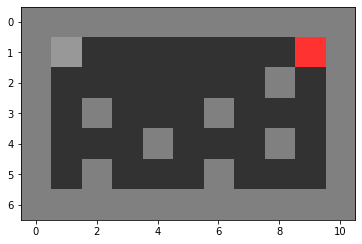

5 40 True
evaluation episode: 0 R: 33


In [11]:
agent.set_eval_mode()
for i in range(1):
    obs = env.reset()
    # break
    R = 0
    t = 0
    while True:
        # Uncomment to watch the behavior in a GUI window
        clear_output(wait=True)
        plt.imshow(env.render('rgb_array'))
        plt.show()
        # env.render(mode='rgb_array')
        # env.render()
        action = agent.act(obs)
        obs, r, done, _ = env.step(action)
        print(action, r, done)

        R += r
        t += 1
        reset = t == 500
        time.sleep(0.5)
        if done or reset:
            break
    print('evaluation episode:', i, 'R:', R)

### Curriculum API:

In [ ]:
r_teacher = Random_Curriculum(env, trainee=agent)
r_teacher.teach()